**Рабочая тетрадь №4**

**Регрессия** — это зависимость среднего значения какой-либо величины от некоторой другой величины или от нескольких других величин. При регрессионной связи одному и тому же значению независимой переменной(***фактору***) *x* могут соответствовать в зависимости от конкретного случая различные значения переменной (***отклика***) *у*.

По количеству факторов выделяют парную(однофакторную) и множественную(многофактурную) регрессию. Для парной будем рассматривать следующие методы регрессии: линейную, показательную, экспоненциальную, гиперболическую и параболическую.

**Регрессионный анализ** — это раздел математической статистики, изучающий регрессионную зависимость между случайными величинами по статистическим данным.

**Линейные регрессионные модели**

**Цель линейной регрессии** — поиск линии, которая наилучшим обрахом соответсвует этим точкам. 

**Функция потерь** — это мера количества ошибок, которые шала линейная регрессия делает на наборе данных. Все эти функции вычисляют рассточние между предсказанным значением у(х) и его фактическим значением.

**MSE** — средняя квадратичная ошибка. Чтобы вычислить MSE, мы просто берём все значения ошибок, считаем их квадраты длин и усредняем.

* ***Экстраполяция*** - перенос выводов, сделанных по результатам одной части исследования, на другие части или на явление в целом.

**Пример 1.1.1.** Провести прямую через эксперементальные точки

In [72]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

#Перепишем линейное уравнение y = mx + c как y = Ap, где A = [[x 1]] и p = [[m], [c]]
#Построим А по х

A = np.vstack([x, np.ones(len(x))]).T 
# vstack используется для складывания или объединения последовательности заданных массивов по вертикали (по строкам).
# T - транспонирование 
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [73]:
#Используем метод lstsq для решение уравнения относительно вектора р
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
(m, c)

(0.9999999999999999, -0.9499999999999997)

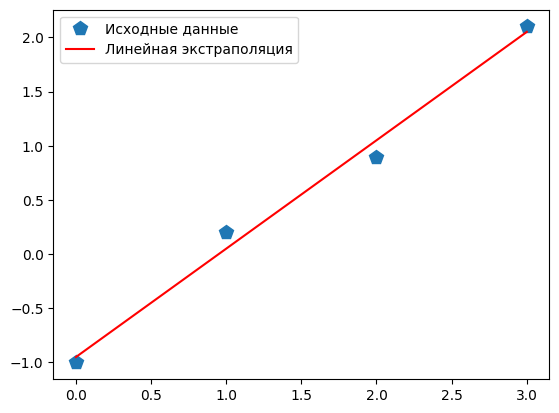

In [74]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'p', label = "Исходные данные", markersize = 10)
plt.plot(x, m*x + c, 'r', label = "Линейная экстраполяция")
plt.legend()
plt.show()

**Пример 1.1.2.** 

Пусть даны два вектора x, y длиной n.  Задача заключается в построении экстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу наименьших квадратов. Данные мтогут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла

In [75]:
from numpy import *
from numpy.random import *
delta = 1.0
n = 11
x = linspace(-5, 5, n)
y = x**2 + delta * (rand(n) - 0.5)
x += delta  * (rand(n) - 0.5)
#Запись в файл(он создается сам)
x.tofile("x_data.txt", '\n')
y.tofile('y_data.txt', '\n')
#Чтение из файла
x = fromfile('x_data.txt', float, sep = '\n')
y = fromfile('y_data.txt', float, sep = '\n')

print('x: ', x)
print('y: ', y)

x:  [-4.5316434  -4.36557836 -3.34627277 -2.28843557 -0.60841678  0.05143267
  1.34580483  2.31732117  3.4805446   3.7440183   4.88401511]
y:  [24.64394211 15.68354839  9.07017569  4.24018663  0.86707867  0.07467691
  0.92670366  4.14045062  8.90364467 15.97292038 24.97599182]


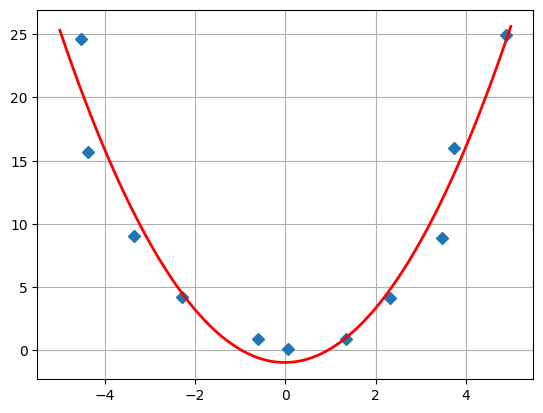

In [76]:
#Нахождение коэффициентов функции вида у = ах^2 + bx + c методом наименьших квадратов
#задаем вектора m = [x**2, x, E]
n = 11
m = vstack((x**2, x, ones(n))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]    #находим коэффициенты при составляющих вектора m

#на отрезку [-5, 5]
x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
#рисуем параболу, где a, b, c мы нашли и записали в s
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], 'r', lw = 2)
plt.grid()
plt.show()


**Пример 1.1.3.**
По данным предыдущего примера построить экстраполяционный полином третьего порядка

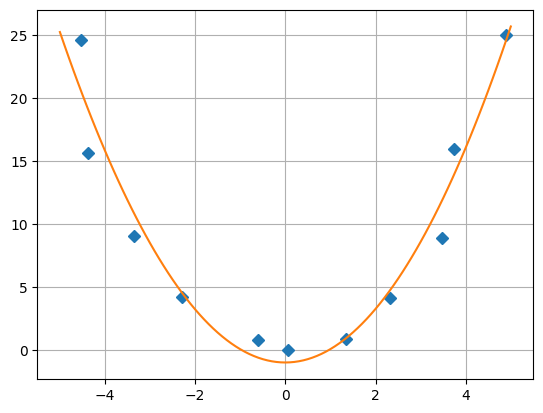

In [77]:
#Нахождение коэффициентов вида y = a * x**3 + b * x ** 2 + c * x + d методом наименьших квадратов
#Задаем m  = [x**3, x**2, x, E]
m = vstack((x**3, x**2, x, ones(n))).T
#находим коффициенты при m
s = np.linalg.lstsq(m, y, rcond=None)[0]
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3])
plt.grid()
plt.show()

**Пример 1.4.1.** Проверить гипотезу, что точечно заданная функция ложится на криву вида f(x,b) = b0 + b1 * exp(-b2 * x ** 2)

In [78]:
import numpy as np
import scipy as sp
from numpy.random import *
#Добавим шума в данные, сделанные по функции f(x, b) с коэфициентами beta
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x ** 2)
#Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#Создаем теоретически правильные значенияя y (без шума)
y = f(xdata, *beta)
#Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
#Используем функцию для получения решения в виде коэффициентов функции для указанных xdata, ydata

from scipy.optimize import curve_fit
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt

array([0.24868219, 0.76556066, 0.52677723])

In [79]:
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отконение
#residuals остатки
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

0.00018914312685493532
0.09790254447876687


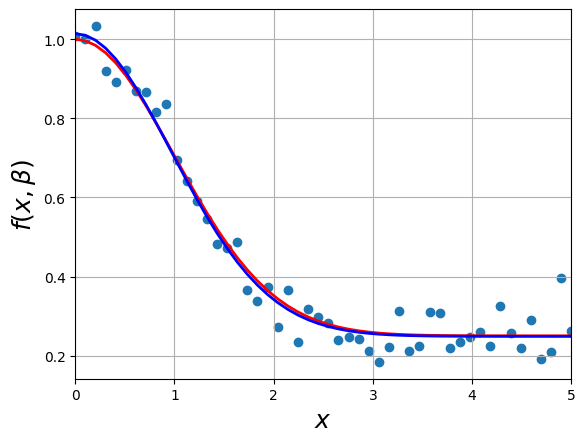

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ] 

 [1.00828377 1.00093322 1.03372343 0.91924402 0.89245703 0.9220963
 0.87024102 0.86740731 0.81718002 0.83523008 0.6945577  0.64090061
 0.59179657 0.54435217 0.4819863  0.47260612 0.4881706  0.36571743
 0.33740518 0.37453274 0.27198633 0.36678348 0.23492297 0.31716098
 0.29726241 0.28226986 0.23851384 0.2460498  0.24224985 0.21193441
 0.18401808 0.22145449 0.31336298 0.21184281 0.22440933 0.30957583
 0.30771546 0.21806112 0.23560349 0.

In [80]:
ax = plt.subplot()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.grid()
plt.show()
print(xdata, '\n\n', ydata)

**Регрессия** — это статистический метод, который связывает зависимую переменную с одной или  несколькими независимыми(объясняющими) переменными. Регрессионая модель способна показать, связаны ли изменения, наблюдаемые в зависимой переменной, с изменениями в одной или нескольких объясняющих переменных.

**Корреляция** — взаимосвязь между разными показателями в статистике. Корреляцию используют, чтобы оценить зависимость переменных друг от друга. Если два показателя коррелируют друг с другом, выше вероятность, что они как-то связаны

**Пример 1.1.5.**
Необходимо проверить гипотезу, что наши точечно заданная функция ложится 
на кривые вида: 
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥
2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥^^𝑏1

beta_opt:  [0.22805934 0.75822085]
Линейное отклонение:  9.468145941294125e-05
Квадратичное отклонение:  0.08325438487415783


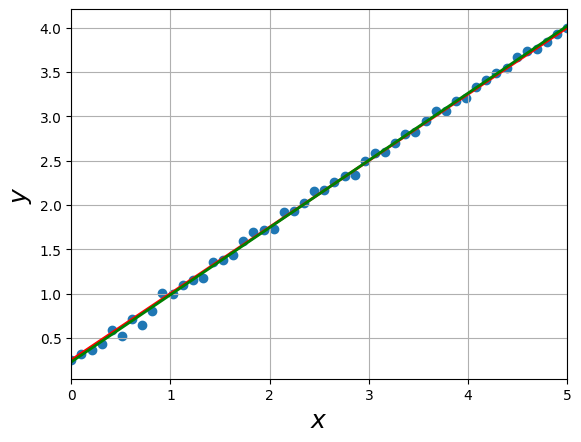

In [81]:
#1
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print("beta_opt: ", beta_opt)

lin_dev = sum(beta_cov[0])
print("Линейное отклонение: ", lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print("Квадратичное отклонение: ", fres)

ax = plt.subplot()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'g', lw = 2)
ax.set_xlim(0, 5) #устанавливает предел просмотра графика от 0 до 5
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$y$", fontsize = 18)
plt.grid()
plt.show()

beta_opt:  [0.23896335 0.76211028 0.49782156]
Линейное отклонение:  0.0001459885398089798
Квадратичное отклонение:  0.12173915291888414


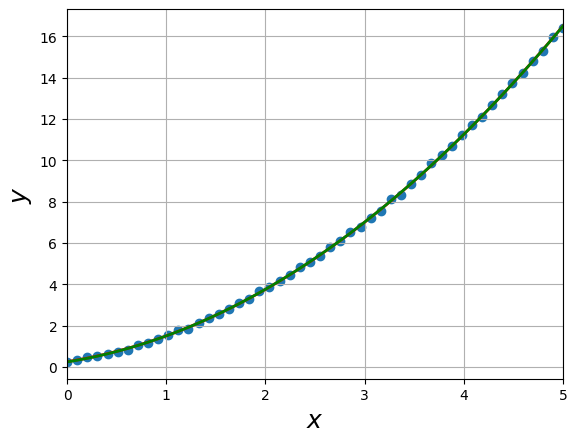

In [82]:
#2
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x ** 2
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print("beta_opt: ", beta_opt)

lin_dev = sum(beta_cov[0])
print("Линейное отклонение: ", lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print("Квадратичное отклонение: ", fres)

ax = plt.subplot()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'g', lw = 2)
ax.set_xlim(0, 5) #устанавливает предел просмотра графика от 0 до 5
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$y$", fontsize = 18)
plt.grid()
plt.show()

beta_opt:  [0.24529912 0.75289836]
Линейное отклонение:  4.447043208217948e-05
Квадратичное отклонение:  0.10283525923622638


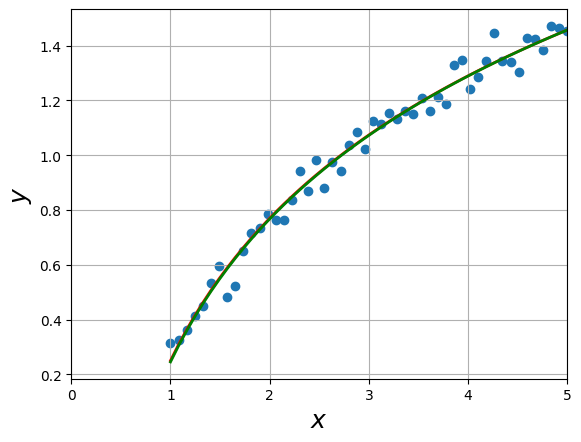

In [83]:
#3
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print("beta_opt: ", beta_opt)

lin_dev = sum(beta_cov[0])
print("Линейное отклонение: ", lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print("Квадратичное отклонение: ", fres)

ax = plt.subplot()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'g', lw = 2)
ax.set_xlim(0, 5) #устанавливает предел просмотра графика от 0 до 5
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$y$", fontsize = 18)
plt.grid()
plt.show()

beta_opt:  [1.00137391 1.99818243]
Линейное отклонение:  5.761047255546313e-06
Квадратичное отклонение:  0.11133773218081854


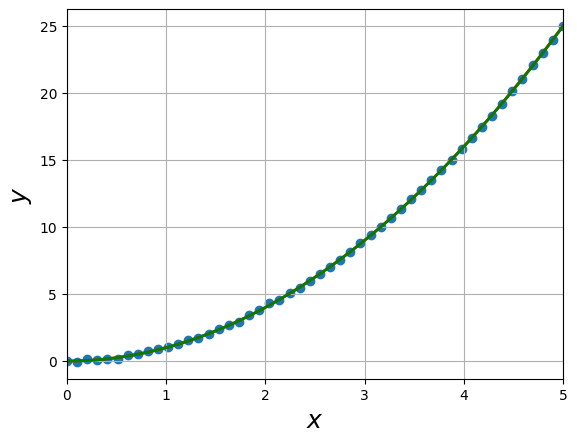

In [84]:
#4
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print("beta_opt: ", beta_opt)

lin_dev = sum(beta_cov[0])
print("Линейное отклонение: ", lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print("Квадратичное отклонение: ", fres)

ax = plt.subplot()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'g', lw = 2)
ax.set_xlim(0, 5) #устанавливает предел просмотра графика от 0 до 5
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$y$", fontsize = 18)
plt.grid()
plt.show()

**Линейная регрессия. Scikit-Learn**


**Пример 1.2.1.**

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
my_dict = {'Учебное время' : [0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5],
           'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]} 
dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [86]:
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


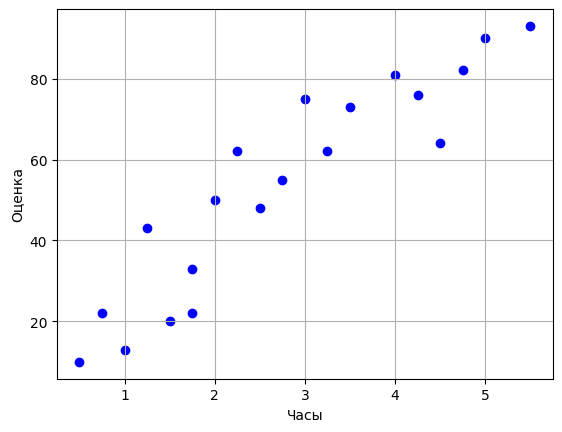

In [87]:
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "Данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.grid()
plt.show()

После того, как мы получили представление о данных, разделим информацию на *атрибуты* и *метки*. ***Атрибуты*** — это независимые переменные, а ***метки***  это зависимые переменные, значения которых должны быть предсказаны.

In [88]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values.T
print("атрибуты x: ", x)
print("метки y: ", y)

атрибуты x:  [[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
метки y:  [10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#Теперь можно обучить алгоритм линейной регрессии
# Для этого необходимо импортировать класс LinearRegression, т.е. создать его экземпляр
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

5.475400029908791
[17.02706744]


Перехват (Intercept) в линейной регрессии представляет собой значение прогноза модели при нулевых значениях всех независимых переменных. Он позволяет моделировать зависимости, которые не проявляются при отсутствии всех признаков. Таким образом, перехват может быть полезен для моделирования базовой зависимости, которую мы не можем объяснить с помощью данных.

Получившийся результат можно интепретировать следубщим образом: ***с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов.***

**Перехват** равен 5,4 балла — это средний балл человека, который не готовилс к экзамену

Сделаем прогноз на тестовых данных

In [90]:
y_pred = regressor.predict(x_test)
#сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


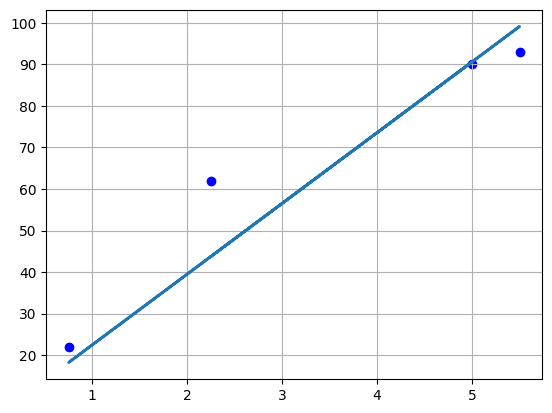

In [91]:
plt.scatter(x_test, y_test, color = 'b')
plt.plot(x_test, y_pred, linewidth = 2)
plt.grid()
plt.show()

**Задание.** Постройте модель линейной регрессии для произвольных данных из  двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы. Найдите коэффициенты линии регрессии, постройте прогноз.

In [92]:
import pandas as pd
from pandas import DataFrame
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataframe = pd.read_csv(url)
dataframe.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [93]:
x_data = dataframe.iloc[:, :-1].values
y_data = dataframe.iloc[:, 1].values.T
print(x_data)
print(y_data)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


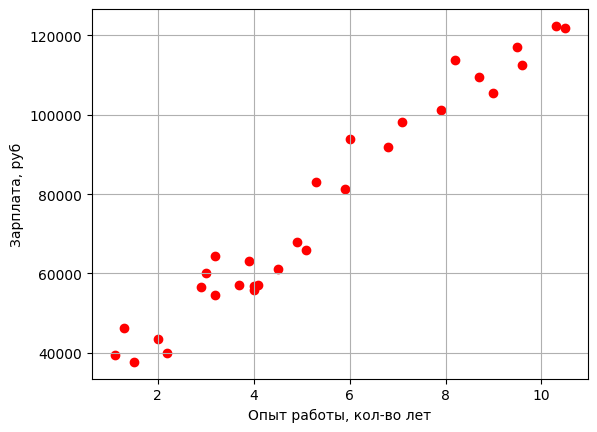

In [94]:
import matplotlib.pyplot as plt
plt.scatter(x_data, y_data, color = 'r', label = 'Зависимость заработной платы от опыта работы')
plt.xlabel('Опыт работы, кол-во лет')
plt.ylabel('Зарплата, руб')
plt.grid()
plt.show()

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Коэффициент регрессии: ", regressor.coef_)
print("Перехват регрессии: ", regressor.intercept_)


Коэффициент регрессии:  [9312.57512673]
Перехват регрессии:  26780.09915062818


In [96]:
y_pred = regressor.predict(x_test)
comparison = pd.DataFrame({'Предсказанные' : y_pred, 'Актуальные' : y_test})
comparison

,Предсказанные,Актуальные
0,40748.961841,37731.0
1,122699.622956,122391.0
2,64961.657170,57081.0
3,63099.142145,63218.0
4,115249.562855,116969.0
5,107799.502753,109431.0


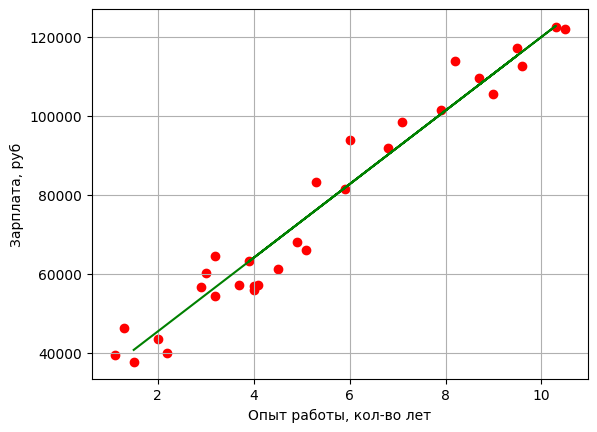

In [97]:
import matplotlib.pyplot as plt
plt.scatter(x_data, y_data, color = 'r', label = 'Зависимость заработной платы от опыта работы')
plt.plot(x_test, y_pred, color = 'g')
plt.xlabel('Опыт работы, кол-во лет')
plt.ylabel('Зарплата, руб')
plt.grid()
plt.show()

**Множественная или многомерная регрессия**

**Пример 1.3.1.** Для задачи множественной регрессии можно задействовать известный метод numpy.linalg.lstsq

In [98]:
import numpy as np
y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5], 
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]
x = np.transpose(x)     #транспонирование
x = np.c_[x, np.ones(x.shape[0])]   #конкатенция. Прибавляем к x справа еще один столбец единиц
linreg = np.linalg.lstsq(x, y, rcond = None)[0] #коэффициенты линейной регрессии
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


**Пример 1.3.2.**
Для данных из предыдущей задачи можно построить модель множественной регрессии с использованием средств библиотеки scikit-learn.

In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5], 
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

#Формируем DataFrame из двух списков
new_y = np.array(y).transpose()
df1 = pd.DataFrame(new_y)
df1 = df1.rename(columns= {0: 'y'}, inplace=False)

new_x = np.array(x).transpose()
df2 = pd.DataFrame(new_x)
df2 = df2.rename(columns= {0: 'x1', 1 : 'x2', 2 : 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis = 1, join = 'inner')
dataset


,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6
5,4,4,5,7
6,5,5,6,8
7,3,9,7,9
8,5,9,5,7
9,5,9,8,8


In [100]:
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [101]:
#Разделим данные на метки и атрибуты
x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']
#Разделим данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Обучаем алгоритм линейной регрессии
regressor = LinearRegression()
regressor.fit(x_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [102]:
#Сделаем прогноз
y_pred = regressor.predict(x_test)
test = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
test

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [103]:
#Оценим производительность алгоритма. Найдем значение для MSE (средняя квадратичная ошибка)
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error:  1.3272699242343065


**Задание.** Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа(в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина. Найдите коэффициенты множественной регрессии, постройте прогноз

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv


2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv


In [104]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
dataset = pd.read_csv(url)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [105]:
print(dataset.shape)
dataset.describe()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [106]:
name_column = list(dataset.columns)[:-1]
print(name_column)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [107]:
#Разделим данные на метки и атрибуты
x = dataset[name_column]
y = dataset['quality']
#Разделилим данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
coeff_regr = pd.DataFrame(regressor.coef_, x.columns, columns= ['Coefficient'])
coeff_regr

,Coefficient
fixed acidity,0.037861
volatile acidity,-1.096569
citric acid,-0.183492
residual sugar,0.029288
chlorides,-1.934543
free sulfur dioxide,0.003436
total sulfur dioxide,-0.003012
density,-31.423927
pH,-0.354567
sulphates,0.910150


In [108]:
y_pred = regressor.predict(x_test)
test = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
test

,Actual,Predicted
1109,6,5.770942
1032,5,5.044279
1002,7,6.574627
487,6,5.347710
979,5,5.928776
...,...,...
1390,6,6.226846
728,5,5.365686
993,5,5.291482
9,5,5.699227


**Аппроксимацией функции** называется приближенное представление. сложной (имеющей громоздкое математическое представление) или заданной в виде таблицы функции f (x) более простой функцией ψ (х), имеющей минимальные отклонения от исходной функции в заданной. области х. По сути, аппроксимация – это моделирование сложной функции более простой с вычислительной точки зрения функцией.

**Задание***

Экспериментально получены N значений Y при различных значениях величины X. Построить полиномы первой и второй степень, апроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков полученных полиномов

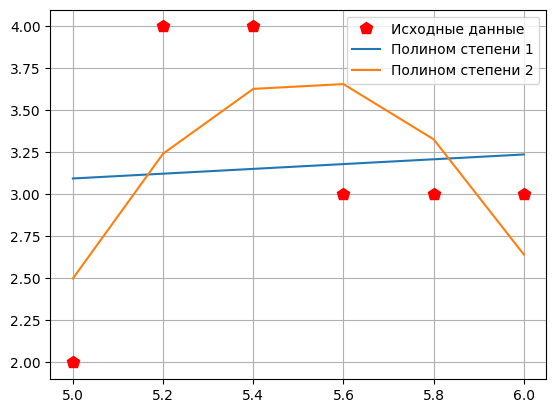

Линейное отклонени полинома степени 1:  25.035824679842346
Линейное отклонени полинома степени 2:  5532.845377595369


In [110]:
#Вариант 5. Способ 1
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def polynom_agr_1(x, b1, b2):
    return b1 + x * b2

def polynom_agr_2(x, b1, b2, b3):
    return b1 + b2 * x + b3 * x ** 2

x = np.array([5, 5.2, 5.4, 5.6, 5.8, 6.0])
y = np.array([2, 4, 4, 3, 3, 3])

beta1_coef, beta1_covariance = curve_fit(polynom_agr_1, x, y)
beta2_coef, beta2_covariance = curve_fit(polynom_agr_2, x, y)

plt.plot(x, y, 'p', color = 'r', markersize=9, label = 'Исходные данные')
plt.plot(x, polynom_agr_1(x, *beta1_coef), label = 'Полином степени 1')
plt.plot(x, polynom_agr_2(x, *beta2_coef), label = 'Полином степени 2')
plt.legend()
plt.grid()
plt.show()

lin_dev1 = sum(beta1_covariance[0])
lin_dev2 = sum(beta2_covariance[0])
print("Линейное отклонени полинома степени 1: ", lin_dev1)
print("Линейное отклонени полинома степени 2: ", lin_dev2)


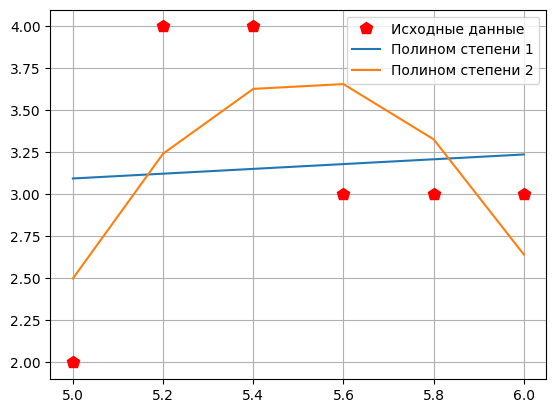

In [111]:
#Вариант 5. Способ 2. Метод наименьших квадратов
import numpy as np
import numpy.linalg 
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

x = np.array([5, 5.2, 5.4, 5.6, 5.8, 6.0])
y = np.array([2, 4, 4, 3, 3, 3])

def polynom_agr_1(x, b1, b2):
    return b1 + x * b2

def polynom_agr_2(x, b1, b2, b3):
    return b1 + b2 * x + b3 * x ** 2

A1 = np.vstack([np.ones(len(x)), x]).T
A2 = np.vstack((np.ones(len(x)), x, x ** 2)).T
beta1_coef = np.linalg.lstsq(A1, y, rcond= None)[0]
beta2_coef = np.linalg.lstsq(A2, y, rcond=None)[0]

plt.plot(x, y, 'p', color = 'r', markersize=9, label = 'Исходные данные')
plt.plot(x, polynom_agr_1(x, *beta1_coef), label = 'Полином степени 1')
plt.plot(x, polynom_agr_2(x, *beta2_coef), label = 'Полином степени 2')
plt.legend()
plt.grid()
plt.show()
